In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
y_n_colors = {'N':'#C03028', 'Y':'#78C850'} # Red, Green

In [2]:
loan_approval_train = pd.read_csv("loan_approval_train.csv")
loan_approval_test = pd.read_csv("loan_approval_test.csv")

In [3]:
loan_approval_train.shape

(614, 13)

In [4]:
loan_approval_train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
def objects_to_categories(df):
    for col in df:
        if (col != 'Loan_ID' and df[col].dtype == 'object'):
            df[col] = df[col].astype('category')

In [6]:
objects_to_categories(loan_approval_train)
loan_approval_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Loan_ID            614 non-null    object  
 1   Gender             601 non-null    category
 2   Married            611 non-null    category
 3   Dependents         599 non-null    category
 4   Education          614 non-null    category
 5   Self_Employed      582 non-null    category
 6   ApplicantIncome    614 non-null    int64   
 7   CoapplicantIncome  614 non-null    float64 
 8   LoanAmount         592 non-null    float64 
 9   Loan_Amount_Term   600 non-null    float64 
 10  Credit_History     564 non-null    float64 
 11  Property_Area      614 non-null    category
 12  Loan_Status        614 non-null    category
dtypes: category(7), float64(4), int64(1), object(1)
memory usage: 33.9+ KB


In [7]:
loan_approval_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

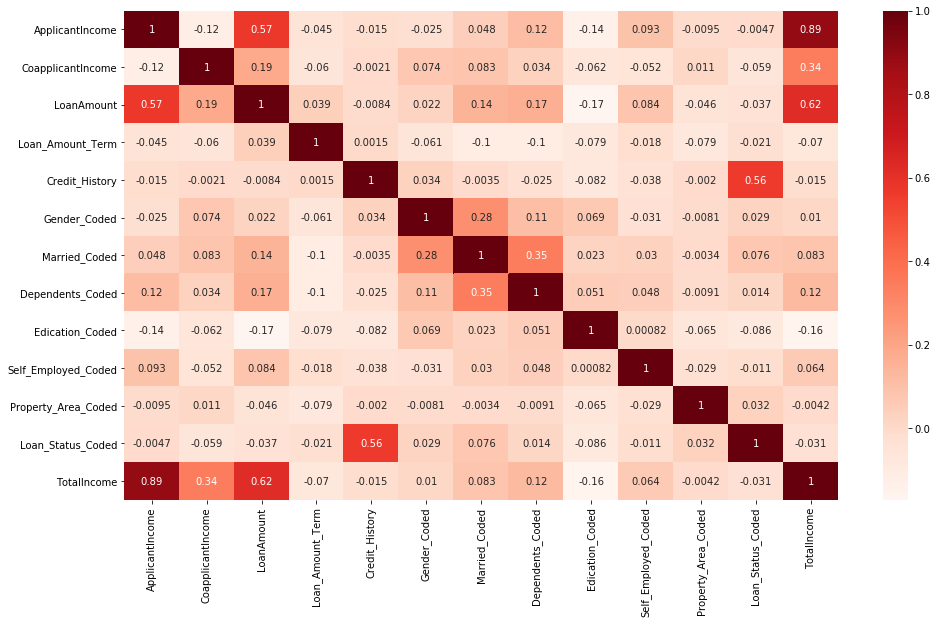

In [15]:
loan_approval_train['Gender_Coded'] = loan_approval_train.Gender.cat.codes
loan_approval_train['Married_Coded'] = loan_approval_train.Married.cat.codes
loan_approval_train['Dependents_Coded'] = loan_approval_train.Dependents.cat.codes
loan_approval_train['Edication_Coded'] = loan_approval_train.Education.cat.codes
loan_approval_train['Self_Employed_Coded'] = loan_approval_train.Self_Employed.cat.codes
loan_approval_train['Property_Area_Coded'] = loan_approval_train.Property_Area.cat.codes
loan_approval_train['Loan_Status_Coded'] = loan_approval_train.Loan_Status.cat.codes
loan_approval_train['TotalIncome'] = loan_approval_train['ApplicantIncome'] + loan_approval_train['CoapplicantIncome']

plt.figure(figsize=(16,9))
sns.heatmap(loan_approval_train.corr(method='pearson'), cmap='Reds', annot=True)

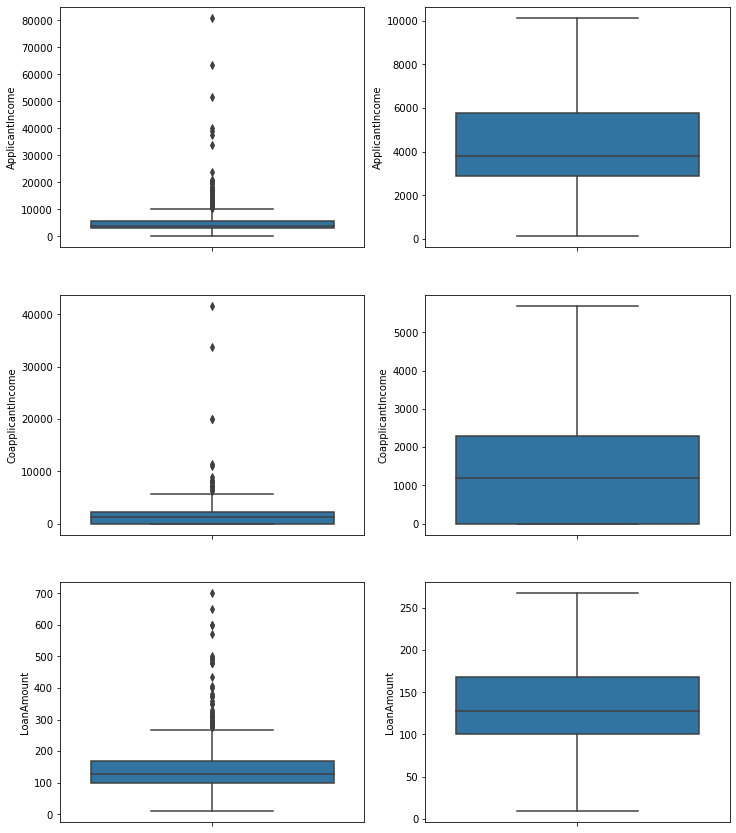

In [55]:
fig, ax = plt.subplots(3, 2, figsize=(12,15))
sns.boxplot(y='ApplicantIncome', data=loan_approval_train, showfliers=True, ax=ax[0,0])
sns.boxplot(y='ApplicantIncome', data=loan_approval_train, showfliers=False, ax=ax[0,1])
sns.boxplot(y='CoapplicantIncome', data=loan_approval_train, showfliers=True, ax=ax[1,0])
sns.boxplot(y='CoapplicantIncome', data=loan_approval_train, showfliers=False, ax=ax[1,1])
sns.boxplot(y='LoanAmount', data=loan_approval_train, showfliers=True, ax=ax[2,0])
sns.boxplot(y='LoanAmount', data=loan_approval_train, showfliers=False, ax=ax[2,1])

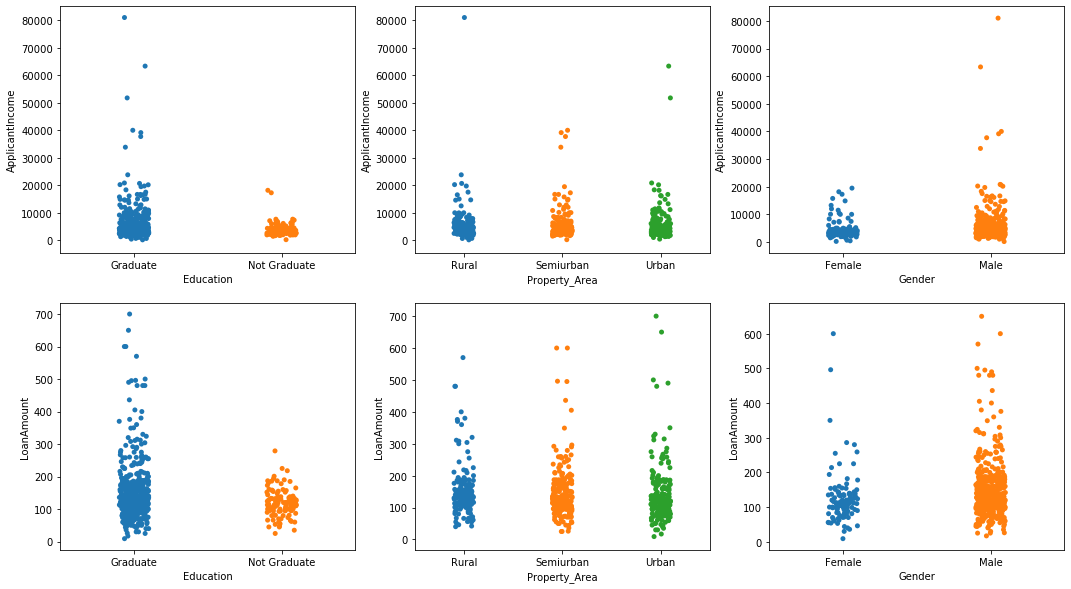

In [56]:
fig, ax = plt.subplots(2, 3, figsize=(18,10))
sns.stripplot(x='Education', y='ApplicantIncome', data=loan_approval_train, ax=ax[0,0])
sns.stripplot(x='Property_Area', y='ApplicantIncome', data=loan_approval_train, ax=ax[0,1])
sns.stripplot(x='Gender', y='ApplicantIncome', data=loan_approval_train, ax=ax[0,2])
sns.stripplot(x='Education', y='LoanAmount', data=loan_approval_train, ax=ax[1,0])
sns.stripplot(x='Property_Area', y='LoanAmount', data=loan_approval_train, ax=ax[1,1])
sns.stripplot(x='Gender', y='LoanAmount', data=loan_approval_train, ax=ax[1,2])

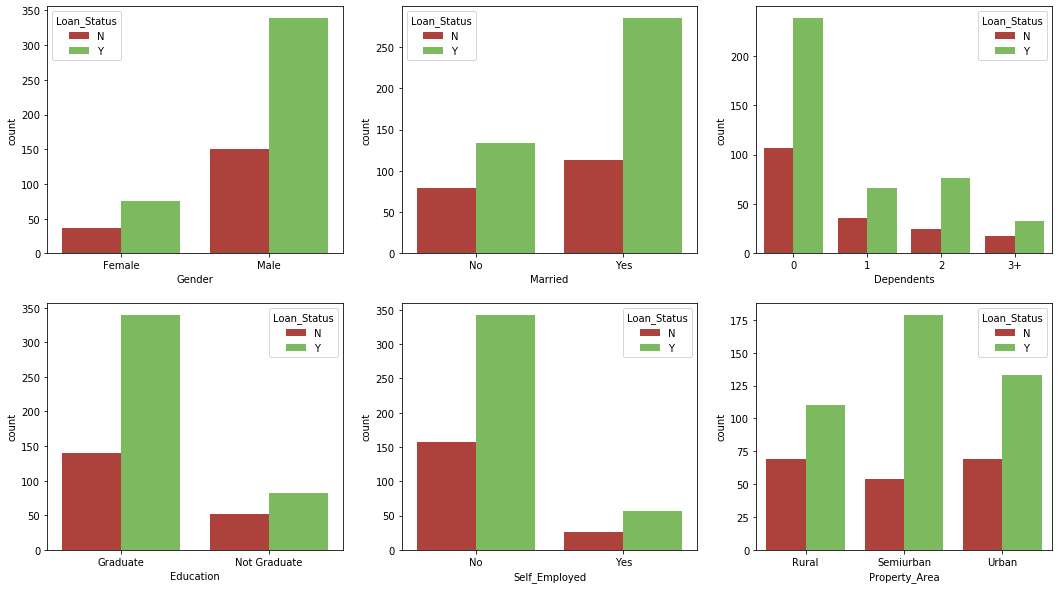

In [46]:
fig, ax = plt.subplots(2, 3, figsize=(18,10))
sns.countplot(x='Gender', hue='Loan_Status', data=loan_approval_train, palette=y_n_colors, ax=ax[0,0])
sns.countplot(x='Married', hue='Loan_Status', data=loan_approval_train, palette=y_n_colors, ax=ax[0,1])
sns.countplot(x='Dependents', hue='Loan_Status', data=loan_approval_train, palette=y_n_colors, ax=ax[0,2])
sns.countplot(x='Education', hue='Loan_Status', data=loan_approval_train, palette=y_n_colors, ax=ax[1,0])
sns.countplot(x='Self_Employed', hue='Loan_Status', data=loan_approval_train, palette=y_n_colors, ax=ax[1,1])
sns.countplot(x='Property_Area', hue='Loan_Status', data=loan_approval_train, palette=y_n_colors, ax=ax[1,2])


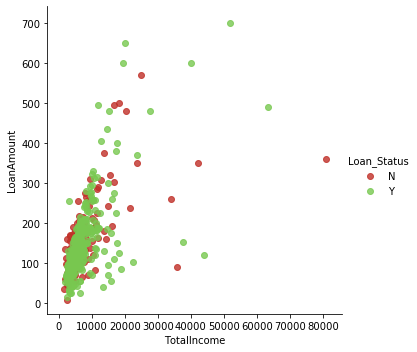

In [11]:
sns.lmplot(x = 'TotalIncome', y = 'LoanAmount', hue = 'Loan_Status', data = loan_approval_train, palette = y_n_colors, fit_reg = False)

In [ ]:
#categorical_columns = loan_approval_train.select_dtypes('category').columns
#imput_encode_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())
#transform_pipeline = ColumnTransformer([("cat", imput_encode_pipeline, categorical_columns),])
#transform_pipeline.fit(loan_approval_train)
#transform_pipeline.transform(loan_approval_train)
#loan_approval_train.info()
#loan_approval_train.head(20)